# Exploratory Analysis of Airbnb and ACS Data on Housing, Nashville, TN

This notebook is designed to explore assets related to data from InsideAirbnb and the U.S. American Community Census Datasets.
The primary goal of this analysis is to determine factors related to rental supply as it relates to Airbnb. 

## Table of Contents

<ol>
    <li>Chapter 1 - Airbnb Listing  
    <li>Chapter 2 - Census Housing Characteristics  
    <li>Chapter 3 - Data Analysis
    <li>Chapter 4 - Joins and Relates 


In [1]:
# import libraries
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 

### Chapter 1 - Airbnb Listings

This chapter explores InsideAirbnb's datasets for Nashville, Tn. 

In [30]:
# read in files 
listings = gpd.read_file("../shp/listings_reprojected.shp");
tracts = gpd.read_file("../shp/davidson_county_tracts.shp")
listing_tract = gpd.read_file("../shp/tracts_listings_joined.shp")
#calender = gpd.read_file("./nashville_airbnb/calendar.csv")

In [32]:
# First, let's set max columns display for geopandas
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 100)

# Adding the plt parameters for charting size 
plt.rcParams['figure.figsize'] = (9, 9)

<AxesSubplot:>

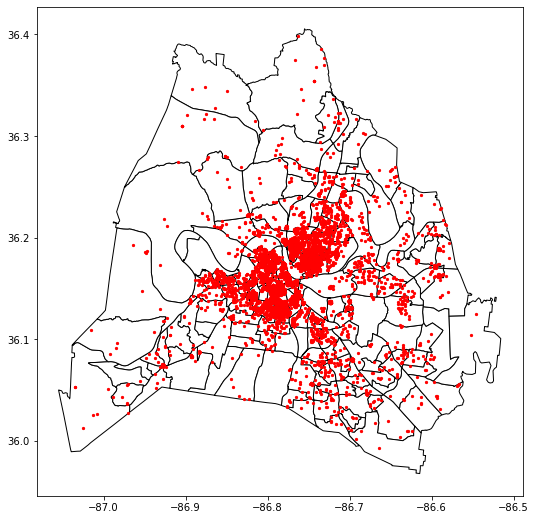

In [33]:
fig, ax = plt.subplots()

tracts.plot(ax=ax, color='white', edgecolor='black');
listings.plot(ax=ax, marker='o', color='red', markersize=5)

Above is a quick map of all Airbnb listings in Davidson County, TN. The high density of which is downtowna and close to the Cumberland River. 

In [4]:
# check type of listing
type(listing_tract)

geopandas.geodataframe.GeoDataFrame

In [23]:
# check info about dtypes, non-null,s columns
listing_tract.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     6366 non-null   object  
 1   COUNTYFP    6366 non-null   object  
 2   TRACTCE     6366 non-null   object  
 3   GEOID       6366 non-null   object  
 4   NAME        6366 non-null   object  
 5   NAMELSAD    6366 non-null   object  
 6   MTFCC       6366 non-null   object  
 7   FUNCSTAT    6366 non-null   object  
 8   ALAND       6366 non-null   int64   
 9   AWATER      6366 non-null   int64   
 10  INTPTLAT    6366 non-null   object  
 11  INTPTLON    6366 non-null   object  
 12  id          6360 non-null   float64 
 13  name_2      6360 non-null   object  
 14  host_id     6360 non-null   float64 
 15  host_name   6186 non-null   object  
 16  neighbourh  0 non-null      object  
 17  neighbou_1  6360 non-null   object  
 18  latitude    6360 non-null   float64 
 19

In [25]:
# check crs 
listing_tract.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
listing_tract.head()

STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      47      037  013202  47037013202  132.02  Census Tract 132.02  G5020   
1      47      037  013202  47037013202  132.02  Census Tract 132.02  G5020   
2      47      037  013202  47037013202  132.02  Census Tract 132.02  G5020   
3      47      037  013202  47037013202  132.02  Census Tract 132.02  G5020   
4      47      037  013202  47037013202  132.02  Census Tract 132.02  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON          id  \
0        S  2721406   12651  +36.1602781  -086.8703605   7805346.0   
1        S  2721406   12651  +36.1602781  -086.8703605  13139208.0   
2        S  2721406   12651  +36.1602781  -086.8703605  13388342.0   
3        S  2721406   12651  +36.1602781  -086.8703605  14487681.0   
4        S  2721406   12651  +36.1602781  -086.8703605  15807102.0   

                                              name_2     host_id host_name  \
0                 The Robertson -  Fab Urban Country   9596278.0     Jacob   
1        Chez Bewer, private room,balcony, and bath.  73222963.0      Kirk   
2                        Nashville's hottest Airbnb!  76043551.0    Daniel   
3    Nashvegas getaway/ hot tub/ 6 miles to downtown  23834026.0   Darlene   
4  ♫Here for a Good Time♫ 9 Min to DTN ⏱ 10AM Che...  52168747.0      Fred   

  neighbourh   neighbou_1  latitude  longitude        room_type  price  \
0       None  District 20  36.15647  -86.86794  Entire home/apt  110.0   
1       None  District 20  36.15409  -86.86391     Private room  139.0   
2       None  District 20  36.15593  -86.86121  Entire home/apt  477.0   
3       None  District 20  36.15246  -86.87215  Entire home/apt  153.0   
4       None  District 20  36.15655  -86.86142  Entire home/apt  300.0   

   minimum_ni  number_of_  last_revie  reviews_pe  calculated  availabili  \
0         1.0       505.0  2021-11-30        6.54         4.0       294.0   
1         1.0       247.0  2021-11-21        3.66         2.0       329.0   
2         2.0       224.0  2021-10-31        3.37         1.0        40.0   
3         2.0       153.0  2021-11-22        2.36         1.0       141.0   
4         2.0       118.0  2021-11-27        1.90         1.0        44.0   

   number_o_1 license                                           geometry  
0        65.0    None  POLYGON ((-86.88928 36.16390, -86.88908 36.163...  
1        35.0    None  POLYGON ((-86.88928 36.16390, -86.88908 36.163...  
2         7.0    None  POLYGON ((-86.88928 36.16390, -86.88908 36.163...  
3        40.0    None  POLYGON ((-86.88928 36.16390, -86.88908 36.163...  
4        24.0    None  POLYGON ((-86.88928 36.16390, -86.88908 36.163...

In [8]:
listing_tract.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'id', 'name_2',
       'host_id', 'host_name', 'neighbourh', 'neighbou_1', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_ni', 'number_of_',
       'last_revie', 'reviews_pe', 'calculated', 'availabili', 'number_o_1',
       'license', 'geometry'],
      dtype='object')

In [9]:
listing_tract.describe

<bound method NDFrame.describe of      STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  \
0         47      037  013202  47037013202  132.02  Census Tract 132.02   
1         47      037  013202  47037013202  132.02  Census Tract 132.02   
2         47      037  013202  47037013202  132.02  Census Tract 132.02   
3         47      037  013202  47037013202  132.02  Census Tract 132.02   
4         47      037  013202  47037013202  132.02  Census Tract 132.02   
...      ...      ...     ...          ...     ...                  ...   
6361      47      037  010904  47037010904  109.04  Census Tract 109.04   
6362      47      037  010904  47037010904  109.04  Census Tract 109.04   
6363      47      037  010904  47037010904  109.04  Census Tract 109.04   
6364      47      037  010904  47037010904  109.04  Census Tract 109.04   
6365      47      037  010904  47037010904  109.04  Census Tract 109.04   

      MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON 

In [11]:
# what are the hosts names?
host = listing_tract["host_name"]

# save out series for room types
room_type = listing_tract["room_type"]

# save out series for prices values
price = listing_tract["price"]


In [36]:
host.value_counts()

TurnKey Vacation Rentals    134
Host Extraordinaires        123
Chris                       100
StayLocal                    81
Kevin                        68
                           ... 
Rod And Alexander             1
Dot                           1
Nurmat                        1
Hotel                         1
Lois                          1
Name: host_name, Length: 1562, dtype: int64

In [20]:
price.value_counts()

150.0     80
200.0     67
100.0     63
99.0      62
89.0      59
          ..
790.0      1
934.0      1
1127.0     1
1299.0     1
682.0      1
Name: price, Length: 728, dtype: int64

In [22]:
room_type.value_counts()

Entire home/apt    5603
Private room        685
Hotel room           56
Shared room          16
Name: room_type, dtype: int64

In [40]:
listing_per_host = listing_tract["calculated"]

In [45]:
listing_per_host.value_counts()

1.0      2252
2.0       698
3.0       417
4.0       224
5.0       150
6.0       150
7.0       140
127.0     127
18.0      126
14.0      126
123.0     123
56.0      112
10.0      110
108.0     108
82.0       82
9.0        81
81.0       81
20.0       80
39.0       78
13.0       78
12.0       72
24.0       72
66.0       66
21.0       63
60.0       60
27.0       54
54.0       54
25.0       50
16.0       48
23.0       46
46.0       46
15.0       45
11.0       44
44.0       44
19.0       38
37.0       37
36.0       36
34.0       34
8.0        32
31.0       31
28.0       28
17.0       17
Name: calculated, dtype: int64